Description du scénario, du problème et de l’ensemble de données
Vous êtes data scientist au sein d’une société immobilière. Votre entreprise dispose d’un ensemble de données montrant les prix des maisons ainsi que 79 caractéristiques décrivant ces maisons. Votre patron veut que vous analysiez cet ensemble de données, que vous proposiez un ensemble d’informations et que vous utilisiez ces données pour construire un modèle d’apprentissage automatique qui peut être utilisé pour prédire le prix d’une maison en fonction de ces 79 caractéristiques. La variable cible ici est SalePrice.

le lien pour telecharger la dataset : https://www.kaggle.com/code/eliekawerk/structuring-a-supervised-learning-project

In [1]:
#importation des  bibliotheque
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#chargement de la base de donnees
df_test = pd.read_csv('test.csv')
dpredict = pd.read_csv('sample_submission.csv')
df= pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h1>exploration des donnees</h1>
<h2>check liste de base</h2>
<ul><h3>analyse de la forme</h3>
<li>variable target : SalePrice </li>
<li>identifier le nombre de ligne et de colonne :notre dataset d'entrainement a 1460 lignes et 81 colonnes</li>
<li>type de variable : nous avons 43 valeurs qualitatives et 38 valeurs quantitatives</li>
<li>analyse des valeurs manquantes : on constate qu'il y'a trois variable(PoolQC,MiscFeature,Alley) avec un taux eleve de valeur manquantes(>90%), fort est de constate que nous avons 3 groupe de variables avec sensiblement le meme nombre de valeur manquante. un des groupes est en rapport avec le garage raison pour la quelle si une information manque dans un element du groupe le reste suivra, pareil pour 'BsmtFinType2' qui concerne le sous sol</li>
</ul>
 <ul><h3>analyse de fond </h3>
 <li>visualisation de la target : nous avons a faire a une donnes continue</li>
<li>signification de la variable : pas grand chose au sujet des variables flotant, on constate que sur la taille des terrains('LotArea') la majorite est consacree entre 6000 et 9600 </li>
 </ul>

In [4]:
print(f"notre dataset d'entrainement a {df.shape[0]} lignes et {df.shape[1]} colonnes")

notre dataset d'entrainement a 1460 lignes et 81 colonnes


In [5]:
# observons quelques information de notre dataset :
df.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [6]:
#etude statistique de nos donnees 
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#affichons le nombres de valeur manquantes par colonnes
pd.set_option('display.max_rows',81)
df.isna().sum().sort_values(ascending = False)/df.shape[0]*100

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

<Axes: >

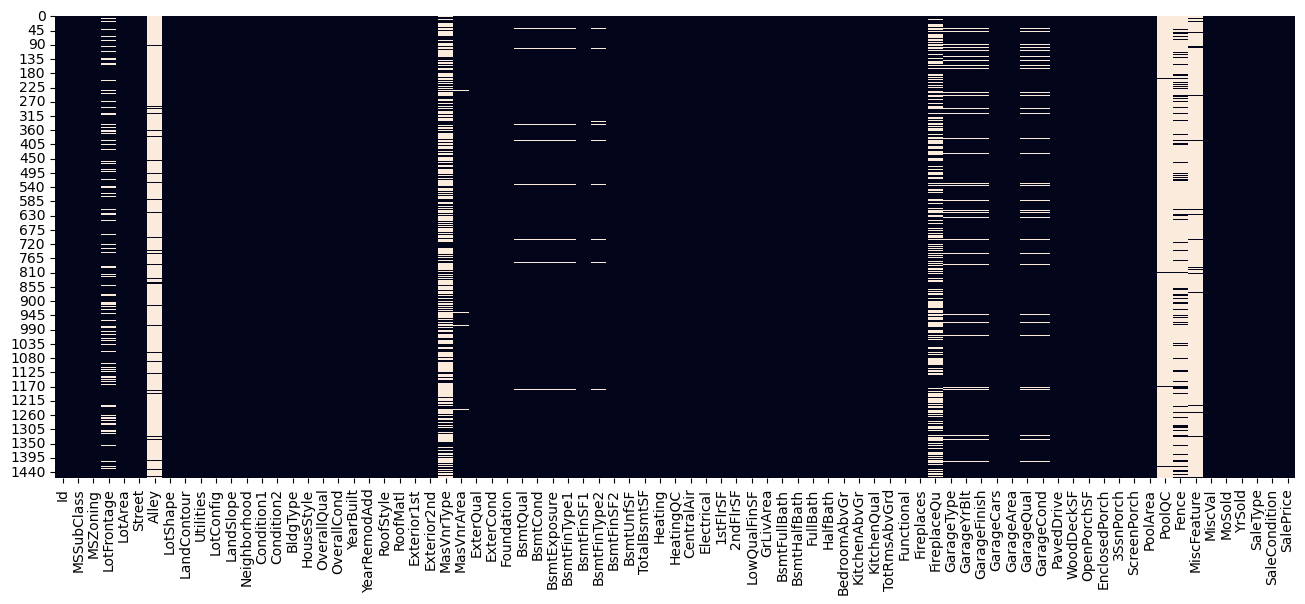

In [8]:
plt.figure(figsize=(16,6))
sns.heatmap(df.isna(),cbar=False)

<ol><h3>analyse de fond </h3>
<li>visualisation initiale et ilimination des colonnes inutiles :</li>
</ol>

<Axes: >

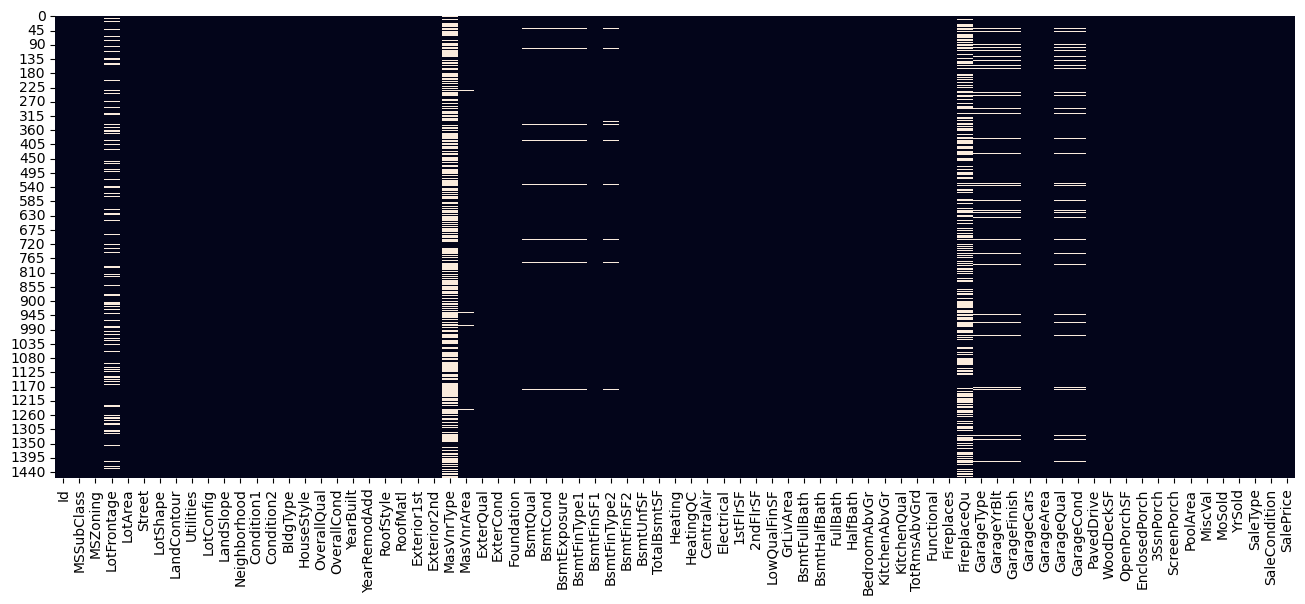

In [9]:
df=df[df.columns[df.isna().sum()/df.shape[0]<0.8]]
plt.figure(figsize=(16,6))
sns.heatmap(df.isna(),cbar=False)

In [10]:
df = df.drop('Id',axis=1)

In [11]:
pd.set_option('display.max_rows',78)
df['SalePrice'].value_counts

<bound method IndexOpsMixin.value_counts of 0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64>

<h2>histogramme des variables continues</h2>

C:\Users\HIGH-TECH CORP'S\AppData\Local\Temp\ipykernel_5568\430285943.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var_float])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HIGH-TECH CORP'S\AppData\Local\Temp\ipykernel_5568\430285943.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with


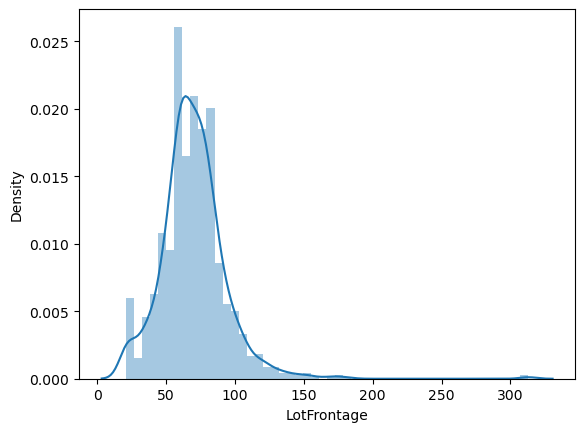

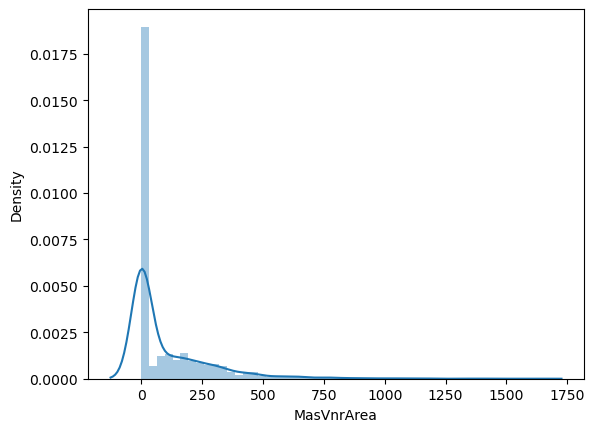

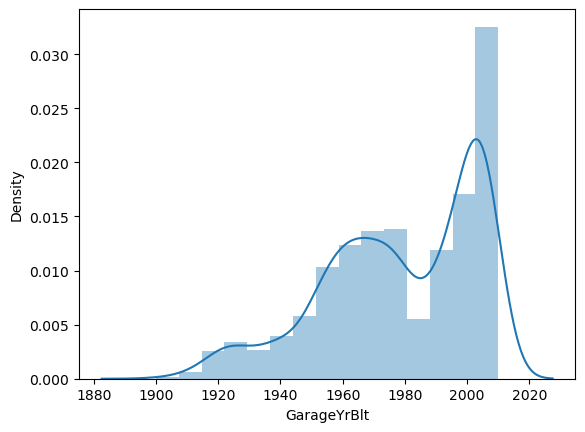

In [132]:
for var_float in df.select_dtypes('float') :
    plt.figure()
    sns.distplot(df[var_float])

<h3>histogramme variable discrette</h3>

C:\Users\HIGH-TECH CORP'S\AppData\Local\Temp\ipykernel_1924\2930774569.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HIGH-TECH CORP'S\AppData\Local\Temp\ipykernel_1924\2930774569.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
simila

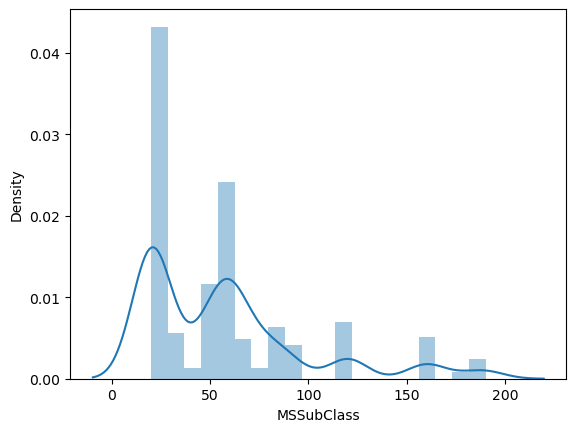

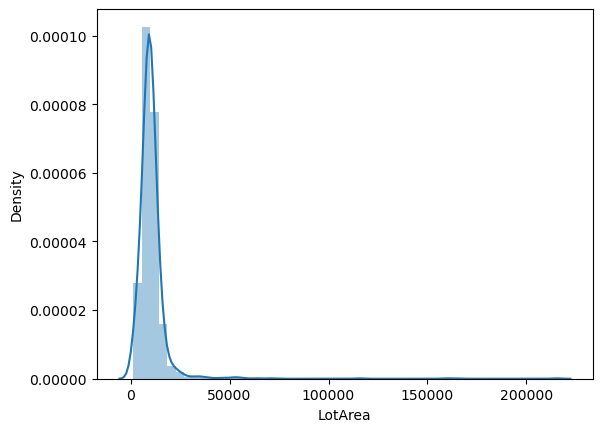

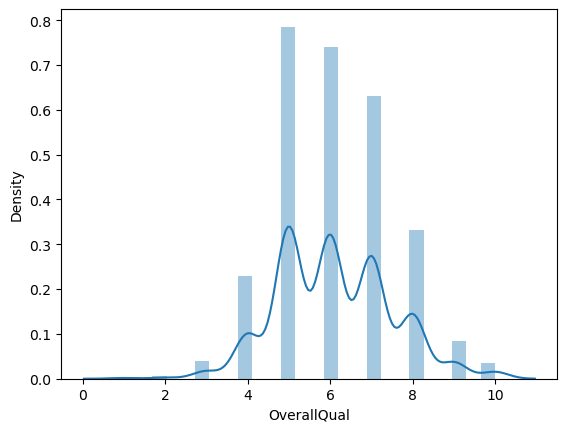

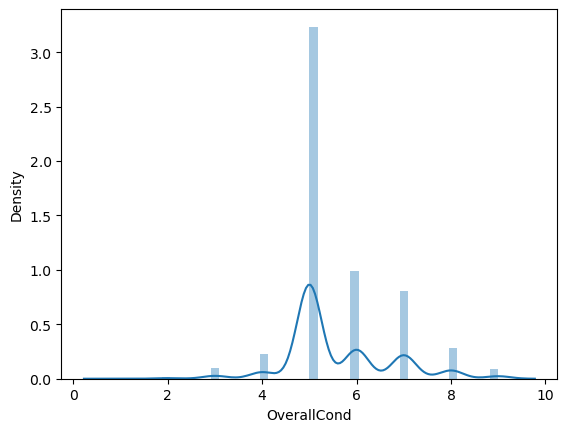

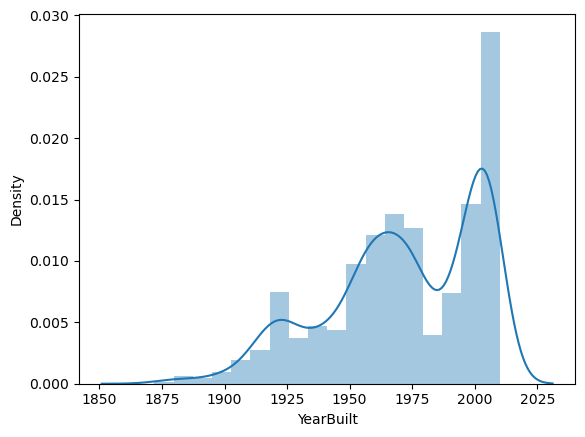

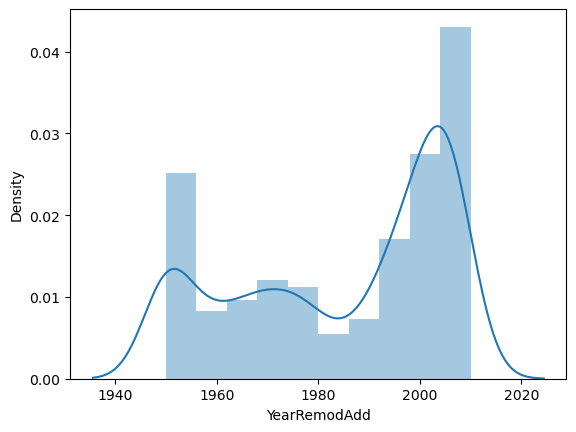

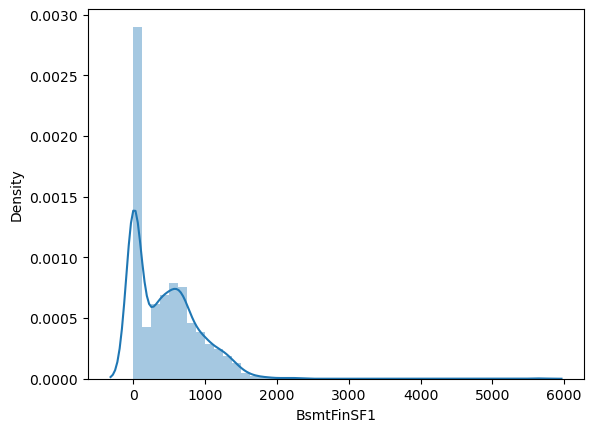

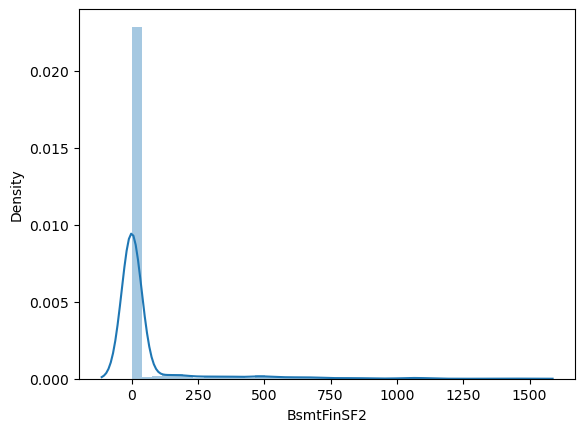

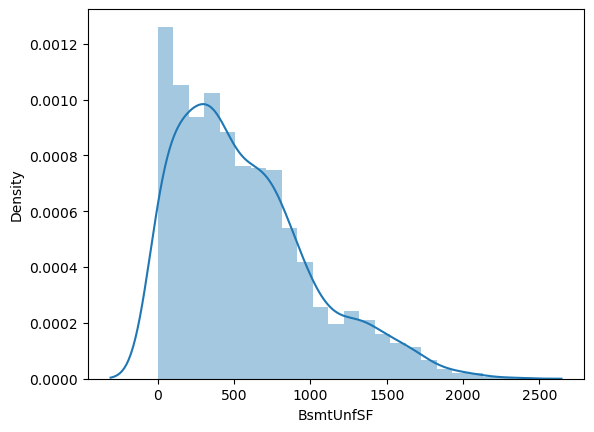

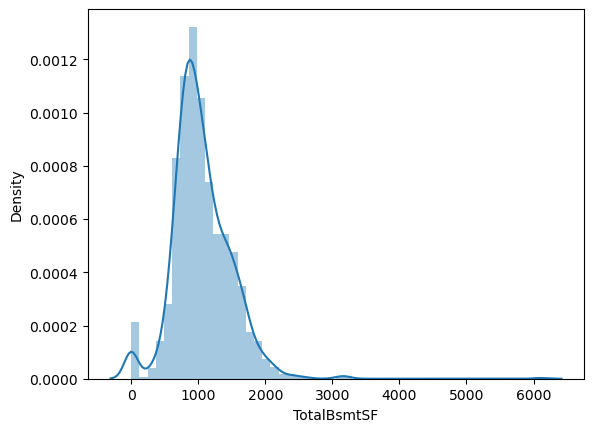

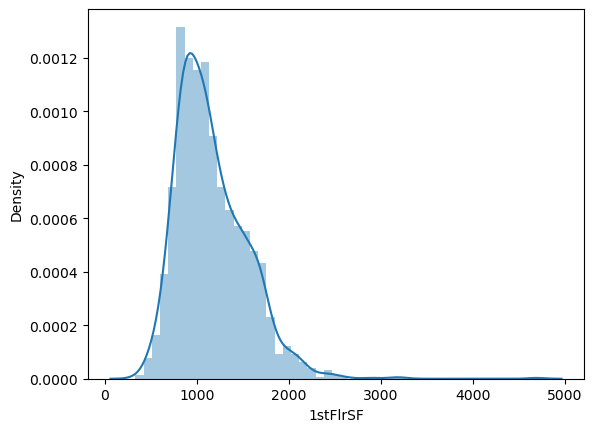

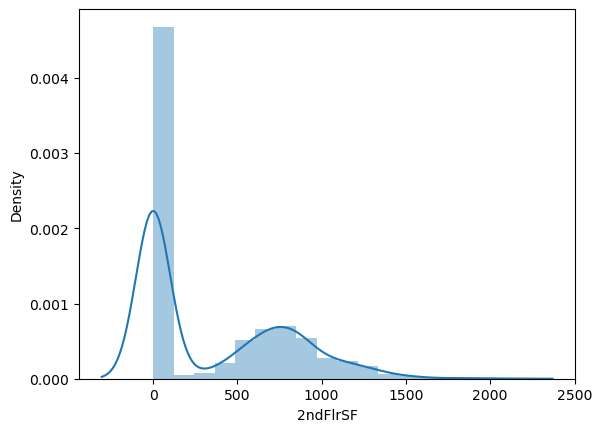

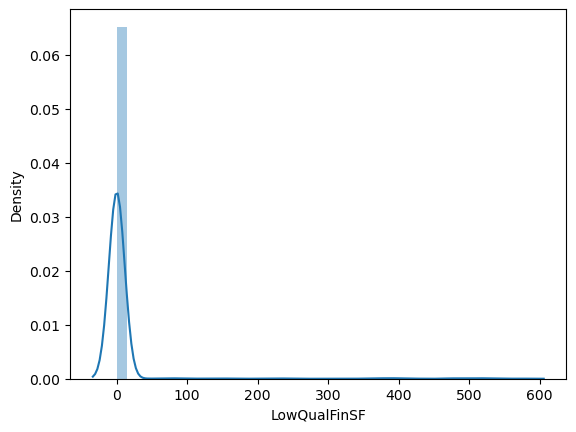

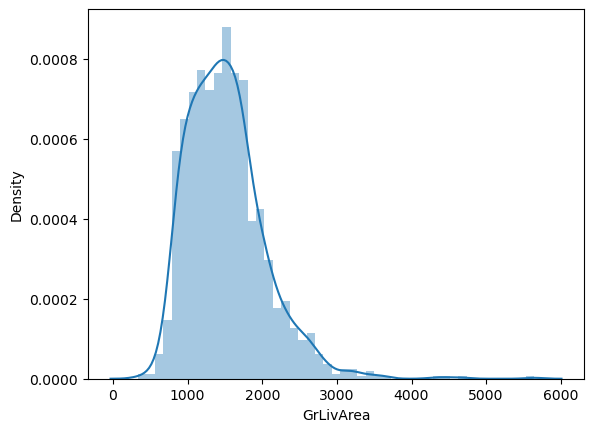

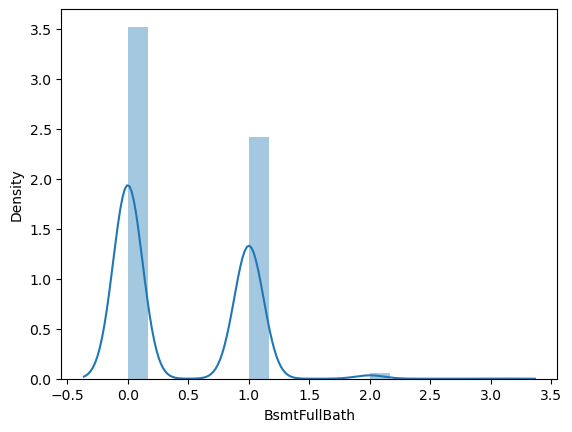

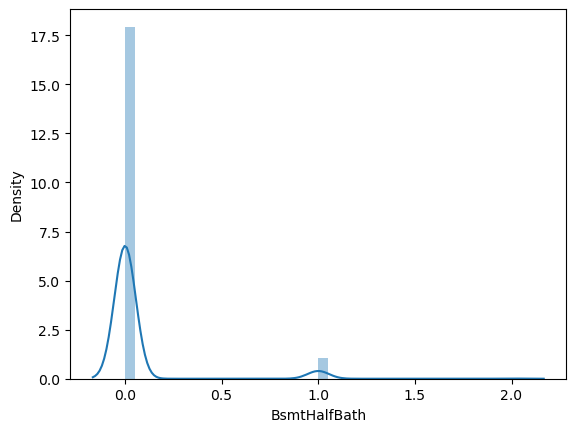

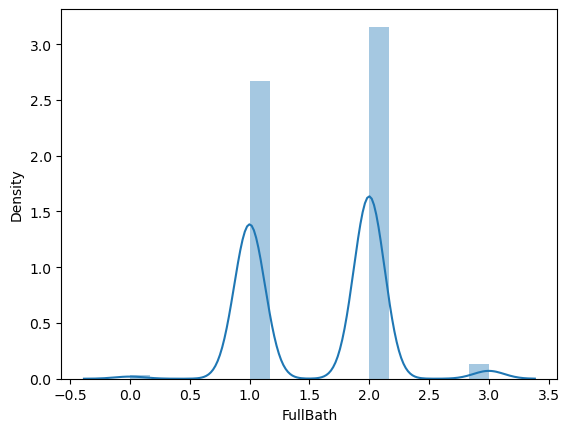

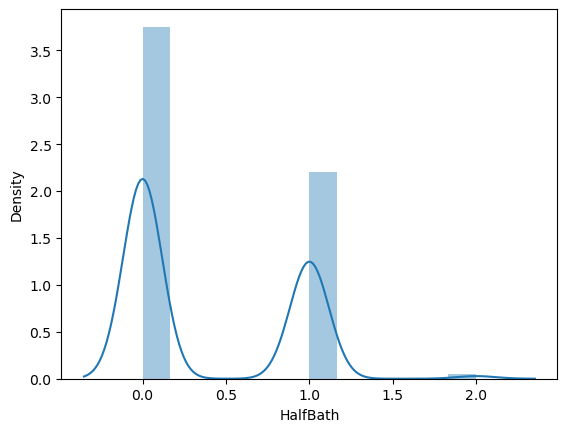

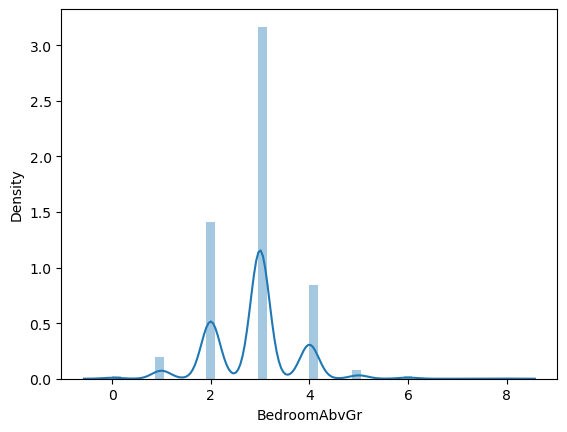

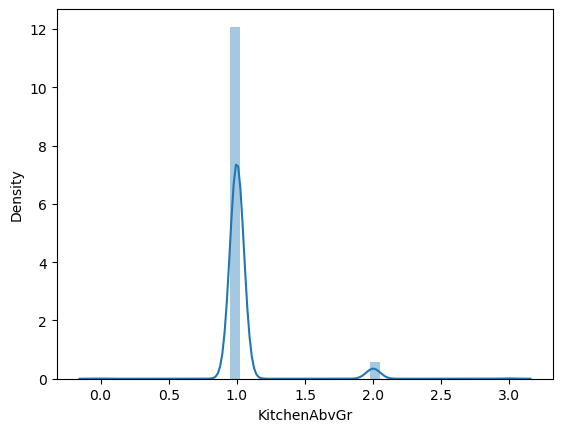

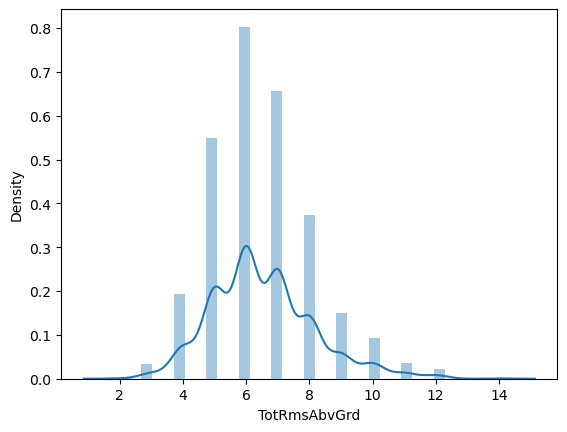

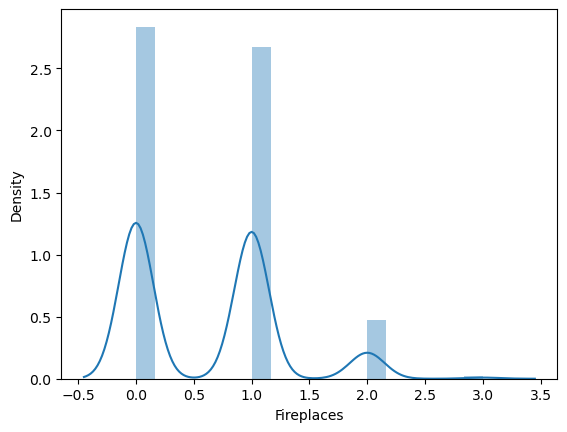

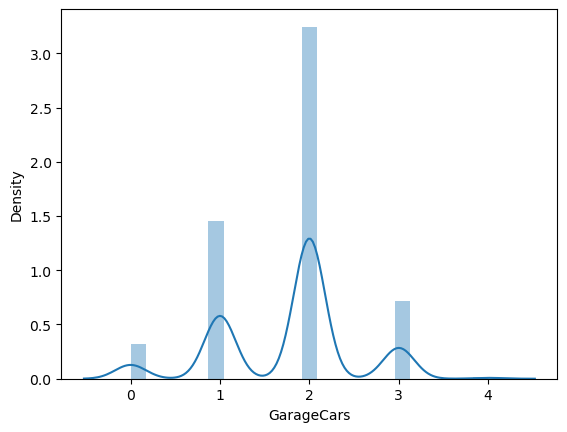

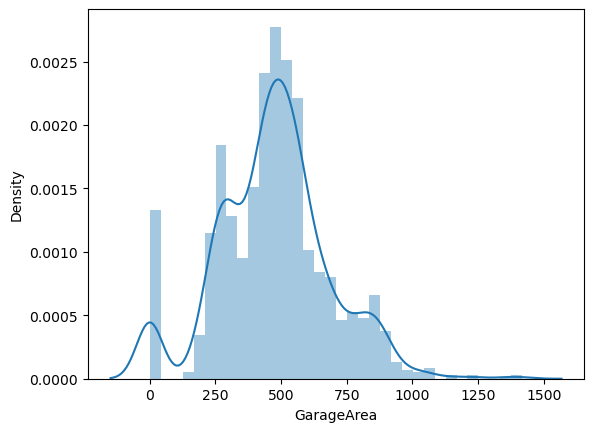

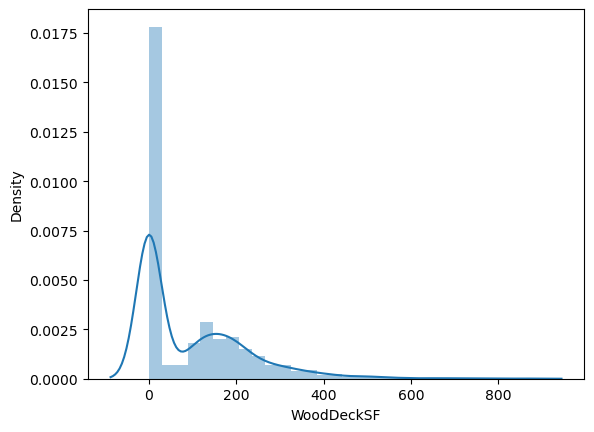

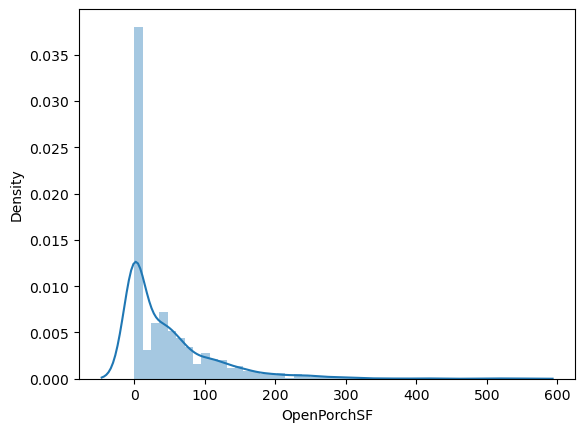

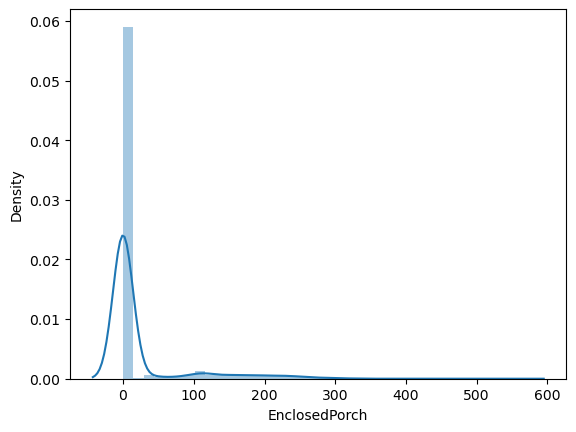

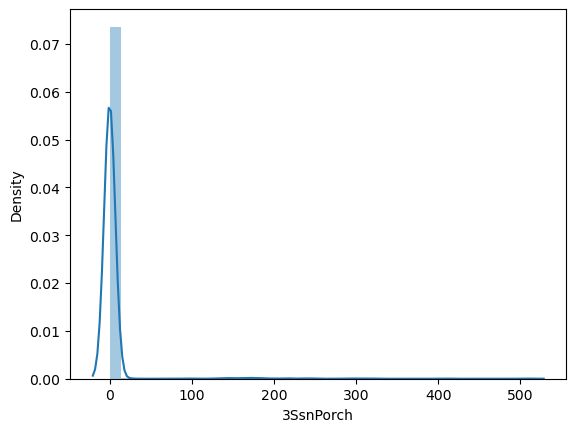

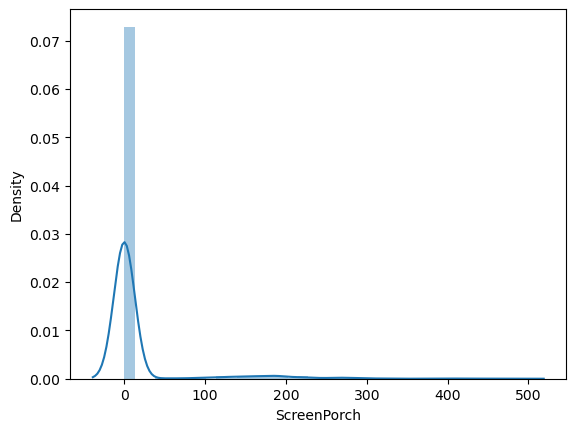

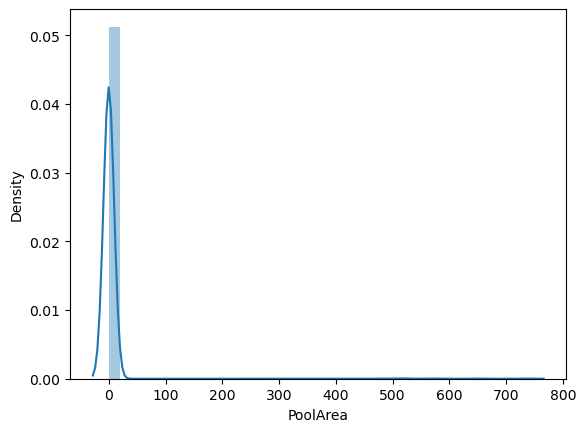

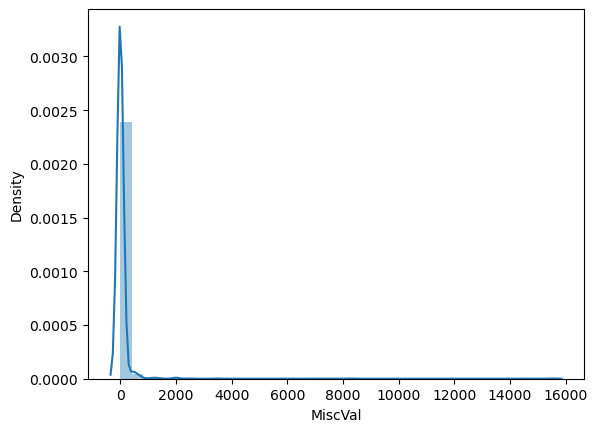

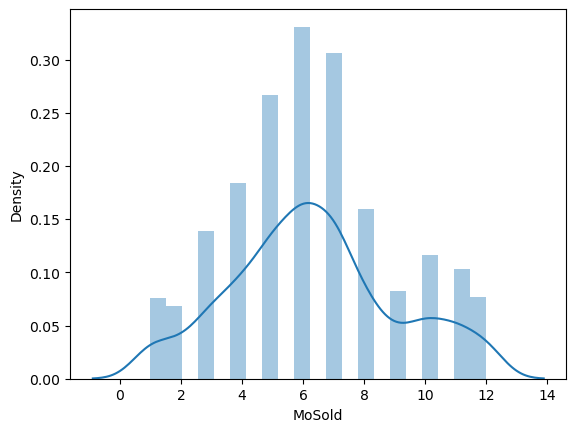

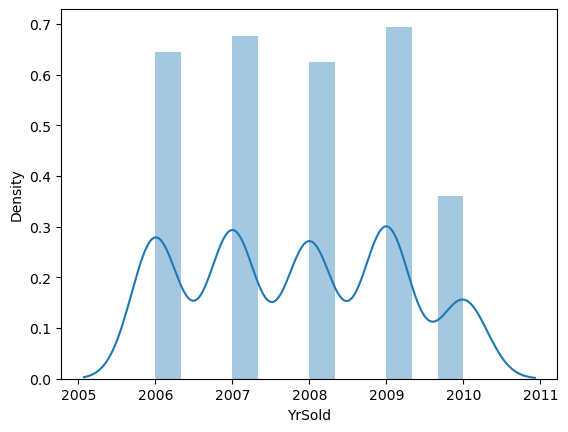

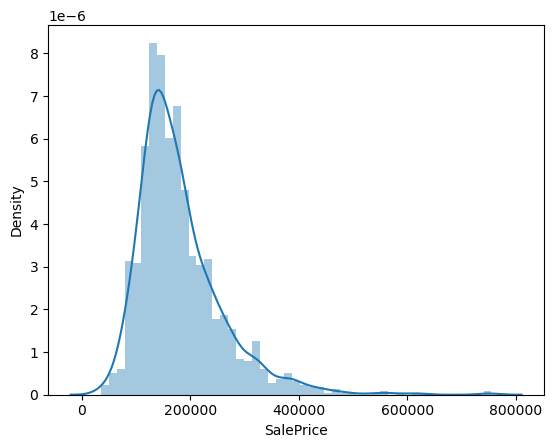

In [12]:
for i in df.select_dtypes('int') :
    plt.figure()
    sns.distplot(df[i])

on constate qu'il y'a beaucoup de variable dont les valeurs sont centrees  en grande partie autour de 0 notamment : BSmtHalfBath,LowQualFinSF,@ndFlrSF etc..
vu la quantite de variable discrette je vous laisse le soin d'apprecier les resultats

<h3>etude variable qualitative </h3>

In [20]:
for i in df.select_dtypes('object') :
    print(f'{i :-<50} {df[i].unique()}')

MSZoning------------------------------------------ ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street-------------------------------------------- ['Pave' 'Grvl']
LotShape------------------------------------------ ['Reg' 'IR1' 'IR2' 'IR3']
LandContour--------------------------------------- ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities----------------------------------------- ['AllPub' 'NoSeWa']
LotConfig----------------------------------------- ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope----------------------------------------- ['Gtl' 'Mod' 'Sev']
Neighborhood-------------------------------------- ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1---------------------------------------- ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2-----------------------------------

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

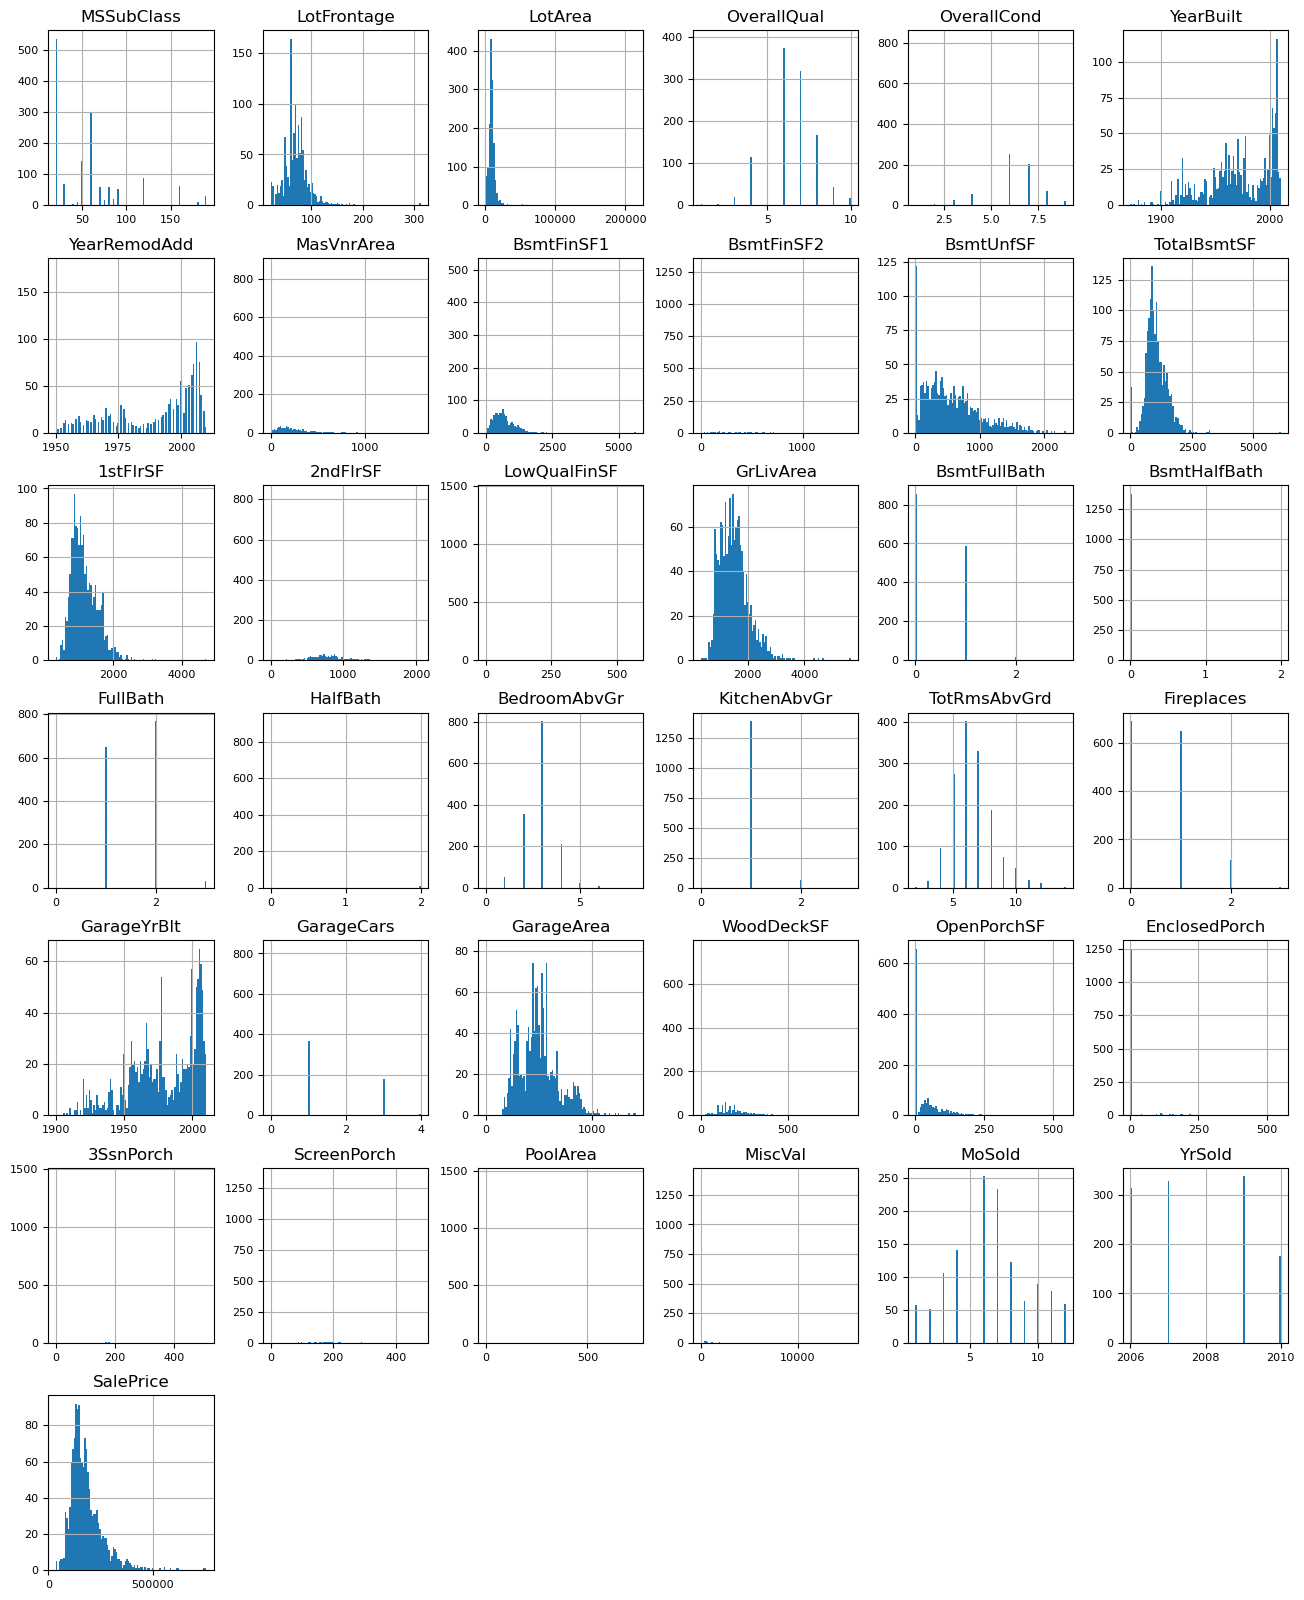

In [28]:
df.hist(figsize=(16, 20), bins=100, xlabelsize=8, ylabelsize=8)

les histogrammes suivants nous montrent pour chaque variable les differents occurences qu'ils existent pour chaue valeur de ces variables

<h2>pre-processing</h2>

In [135]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [137]:
taux_manquante = df.isna().sum().sort_values(ascending = False)/df.shape[0]*100
taux_manquante

Fence            80.753425
MasVnrType       59.726027
FireplaceQu      47.260274
LotFrontage      17.739726
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
GarageYrBlt       5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
Electrical        0.068493
BedroomAbvGr      0.000000
BsmtHalfBath      0.000000
BsmtFullBath      0.000000
Functional        0.000000
FullBath          0.000000
KitchenAbvGr      0.000000
HalfBath          0.000000
Fireplaces        0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
MSSubClass        0.000000
LowQualFinSF      0.000000
GarageCars        0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
M

In [139]:
df=df[df.columns[df.isna().sum()/df.shape[0]<0.8]]


In [140]:
df.shape

(1460, 76)

In [141]:
# Appliquer differentes methodes d’encodage (One-Hot, Label Encoding, etc.)
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVC

In [142]:
list_of_model=[]

In [143]:
X = df.drop(['SalePrice'], axis =1)
y = df['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [144]:
categoriel_feature= make_column_selector(dtype_exclude=np.number)
numeric_feature = make_column_selector(dtype_include=np.number)

In [145]:
pipeline_cat = make_pipeline(SimpleImputer(strategy= 'most_frequent'),OneHotEncoder( handle_unknown='ignore'))
pipeline_num = make_pipeline(SimpleImputer(),MinMaxScaler())

In [146]:
preprocessor = make_column_transformer((pipeline_cat,categoriel_feature),
               (pipeline_num,numeric_feature))

preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000020951CBB9D0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000020952A3C110>)])

In [147]:
KNeighbors = make_pipeline(preprocessor,KNeighborsClassifier())
AdaBoost =  make_pipeline(preprocessor,AdaBoostRegressor(random_state=0))
svm = make_pipeline(preprocessor,SVC())
linearRe = make_pipeline(preprocessor,LinearRegression())
rand_class = make_pipeline(preprocessor,RandomForestRegressor(random_state=42))

In [148]:
list_of_model=[KNeighbors,AdaBoost,svm,linearRe,rand_class]
for i in list_of_model :
        i.fit(X_train,y_train)
        print(f'{i.score(X_train,y_train)*100} %')


17.893835616438356 %
87.78246452941414 %
4.794520547945205 %
94.2885189900006 %
97.89642404201813 %


ici on constate que le meilleur score  est celui de randomForestRegressor. nous l'utiliserons et l'amelioropns si possible

In [149]:
hyper_params = {'randomforestregressor__n_estimators' : [10,50,100],
               'randomforestregressor__max_depth' : [None,5,10]}

In [150]:
grid = GridSearchCV(rand_class,hyper_params, cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'randomforestregressor__max_depth': 10, 'randomforestregressor__n_estimators': 100}


on constate que nos meilleurs parametres sont ceux definient par defaut

In [151]:
modelFinal = grid.best_estimator_

In [152]:
modelFinal.score(X_train,y_train)

0.9751795814399218

In [153]:
modelFinal.predict(X_test)

array([213355.44224068, 149584.70654045, 105541.35933114, 228486.24352771,
        93044.64407753, 109473.6860608 , 263760.48686337, 122535.66254988,
       501002.22666667, 154194.43904328, 196483.66678033, 142023.44236438,
       225229.92805097, 115808.20296773, 124962.68219435, 150353.72278945,
       225888.35053226, 117470.54854906, 143519.74187408, 186642.82006775,
       127564.75864791, 141819.83575428, 115135.89352032, 171753.77745964,
       183634.26650983, 215922.44171603, 167697.16312293,  87271.25714573,
       325174.67075108, 119851.35075675, 136187.81930096, 190112.39905998,
       139772.58026668, 282938.33140243, 332350.54434121, 187023.0475652 ,
       282869.83738492, 126682.07638681, 233998.29624405, 306503.04926272,
       207022.16868178, 131918.63293127, 178721.11548092, 304831.92354134,
       325555.82914538, 137601.12729327, 128310.32043006, 125982.12592993,
       168690.9474794 , 100917.00404109, 367257.38476549, 144667.23958868,
       168237.64500637,  

In [155]:
modelFinal.score(X_test,y_test)

0.8331122228737614